**1. Skapar och förbereder data**

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Skapa syntetiska data (Längd i cm, Skostorlek i EU-storlek, Kön: 0 = kvinna, 1 = man)
data = np.array([
    [160, 37, 0], [165, 38, 0], [170, 39, 0], [175, 40, 0], [180, 41, 0],
    [185, 42, 1], [190, 44, 1], [195, 47, 1], [200, 48, 1], [205, 48, 1]])

X = data[:, :2]  # Funktioner: längd och skostorlek
y = data[:, 2]   # Målvariabel: kön (0 eller 1)
print("Längd och skostorlek:\n", X)
print("Kön: ", y)

# Dela upp data i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("träningsdata: ", X_train)
print("testdata: ", X_test)


Längd och skostorlek:
 [[160  37]
 [165  38]
 [170  39]
 [175  40]
 [180  41]
 [185  42]
 [190  44]
 [195  47]
 [200  48]
 [205  48]]
Kön:  [0 0 0 0 0 1 1 1 1 1]
träningsdata:  [[185  42]
 [160  37]
 [195  47]
 [170  39]
 [205  48]
 [180  41]
 [175  40]
 [190  44]]
testdata:  [[200  48]
 [165  38]]


**2. Normaliserar datat**

In [15]:
# Normalisera datat
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("träningsdata efter normalisering: ", X_train)
print("testdata efter normalisering: ", X_test)

träningsdata efter normalisering:  [[ 0.18569534 -0.0695048 ]
 [-1.67125804 -1.4596009 ]
 [ 0.92847669  1.32059129]
 [-0.92847669 -0.90356246]
 [ 1.67125804  1.59861051]
 [-0.18569534 -0.34752402]
 [-0.55708601 -0.62554324]
 [ 0.55708601  0.48653363]]
testdata efter normalisering:  [[ 1.29986737  1.59861051]
 [-1.29986737 -1.18158168]]


**3. Bygger upp och skapar neuronnätet**

In [16]:
# Bygg ett neuronnät
model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(2,)),  # 2 neuroner i första lagret
    keras.layers.Dense(1, activation='sigmoid')  # 1 utgångsneuron med sigmoid-aktivering
])

# Kompilera modellen
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4. Träna modellen och granska nogrannheten**

Testnoggrannhet: 1.00


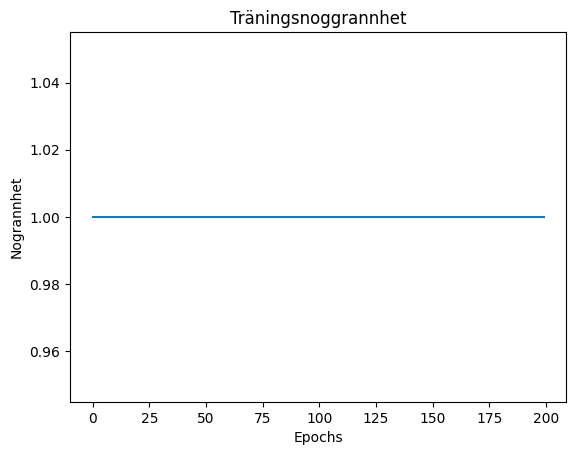

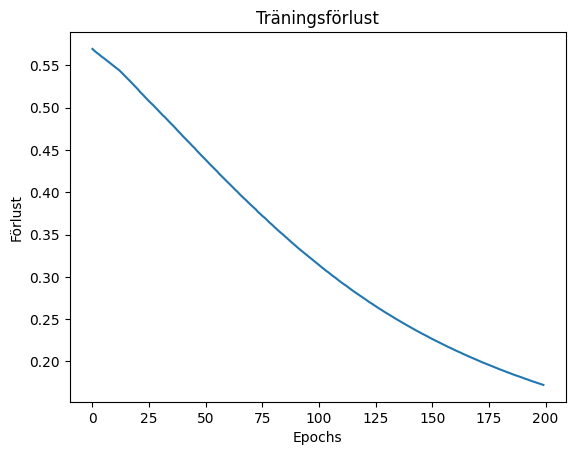

In [17]:
# Träna modellen
history = model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=0)

# Utvärdera modellen
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testnoggrannhet: {accuracy:.2f}")

plt.plot(history.history['accuracy'])
plt.title('Träningsnoggrannhet')
plt.xlabel('Epochs')
plt.ylabel('Nogrannhet')
plt.show()

plt.plot(history.history['loss'])
plt.title('Träningsförlust')
plt.xlabel('Epochs')
plt.ylabel('Förlust')
plt.show()

**5. Vi använder oss av modellen för att uppskatta kön**

In [20]:
ny_person = np.array([[194, 48]])  # Längd: 160 cm, Skostorlek: 36
ny_person = scaler.transform(ny_person)  # Viktigt att skala testexempel också!
prediktion = model.predict(ny_person)
print(f"Sannolikhet att det är en man: {prediktion[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Sannolikhet att det är en man: 0.9076


**6. Av testsyfte: Vi kollar de tränade vikterna och bias**

In [12]:
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"--- Lager {i+1} ---")
    print("Vikter:\n", weights)
    print("Bias:\n", biases)

--- Lager 1 ---
Vikter:
 [[1.6553906 1.6198232]
 [1.2881887 0.2569134]]
Bias:
 [0.41453546 0.38985774]
--- Lager 2 ---
Vikter:
 [[1.5656949]
 [1.136088 ]]
Bias:
 [-0.5062938]
